In [ ]:
!unzip Gd_fps.zip

Archive:  Gd_fps.zip
  inflating: Gd_ctopo_fp_ligand.csv  
  inflating: Gd_ctopo_fp_skl.csv     
  inflating: Gd_ctopo_fp_skl_da.csv  
  inflating: Gd_ctopo_fp_skl_da_bonds.csv  
  inflating: Gd_ctopo_fp_skl_da_skl.csv  
  inflating: Gd_ctopo_fp_skl_da_skl_bonds.csv  
  inflating: Gd_ctopo_fp_topo.csv    
  inflating: Gd_ctopo_fp_topo_da.csv  
  inflating: Gd_ctopo_fp_cmplx.csv   
  inflating: Gd_ctopo_fp_cmplx_da.csv  
  inflating: Gd_ctopo_fp_cmplx_da_bonds.csv  
  inflating: Gd_ctopo_fp_cmplx_da_sub.csv  
  inflating: Gd_ctopo_fp_cmplx_da_sub_bonds.csv  
  inflating: Gd_ctopo_fp_cmplx_full.csv  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
def seed_everything(seed=42):
    np.random.seed(seed)
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

seed_everything(seed=42)

In [ ]:
files = [file for file in os.listdir() if file.endswith('.csv')]

In [ ]:
df = pd.read_csv(files[0])

## Let's do some EDA

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Columns: 2049 entries, bit_0 to lgK
dtypes: float64(1), int64(2048)
memory usage: 3.4 MB


,bit_0,bit_1,bit_2,bit_3,bit_4,bit_5,bit_6,bit_7,bit_8,bit_9,...,bit_2039,bit_2040,bit_2041,bit_2042,bit_2043,bit_2044,bit_2045,bit_2046,bit_2047,lgK
count,217.0,217.0,217.0,217.000000,217.0,217.0,217.000000,217.0,217.0,217.000000,...,217.0,217.0,217.0,217.0,217.0,217.000000,217.0,217.0,217.0,217.000000
mean,0.0,0.0,0.0,0.359447,0.0,0.0,0.004608,0.0,0.0,0.004608,...,0.0,0.0,0.0,0.0,0.0,0.013825,0.0,0.0,0.0,17.402166
std,0.0,0.0,0.0,0.480948,0.0,0.0,0.067884,0.0,0.0,0.067884,...,0.0,0.0,0.0,0.0,0.0,0.117034,0.0,0.0,0.0,4.636913
min,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,3.720000
25%,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,14.500000
50%,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,17.300000
75%,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,20.420000
max,0.0,0.0,0.0,1.000000,0.0,0.0,1.000000,0.0,0.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,28.800000


In [ ]:
(df.drop(columns="lgK").sum() / len(df)).describe()  # proportion of 1s per feature

,0
count,2048.000000
mean,0.013854
std,0.072644
min,0.000000
25%,0.000000
50%,0.000000
75%,0.004608
max,1.000000


<Axes: >

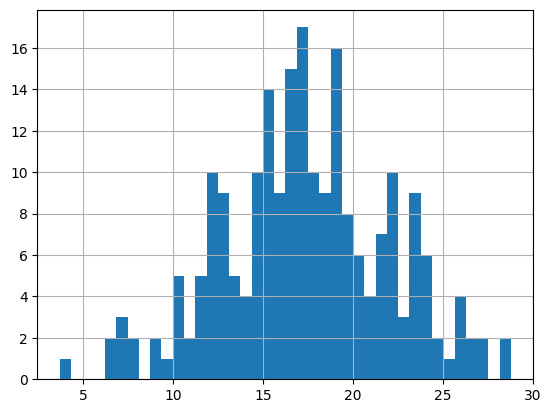

In [ ]:
#fix this
df["lgK"].hist(bins=40)

<Axes: ylabel='Density'>

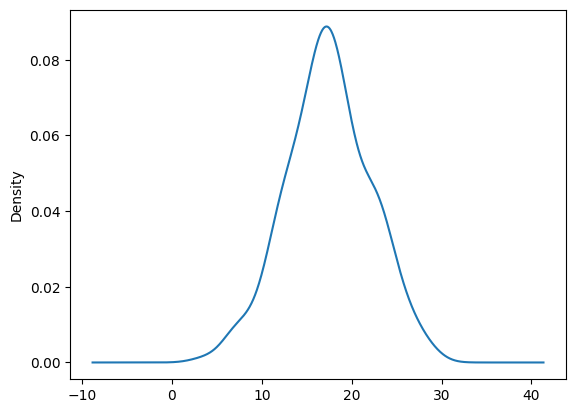

In [ ]:
df["lgK"].plot(kind="kde")

<Axes: >

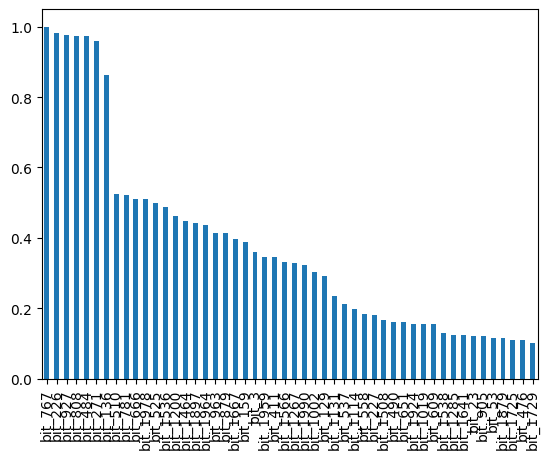

In [ ]:
feature_freq = df.drop(columns="lgK").mean().sort_values(ascending=False)
feature_freq.head(50).plot.bar()
#feature_freq.tail(20).plot.bar()

<Axes: >

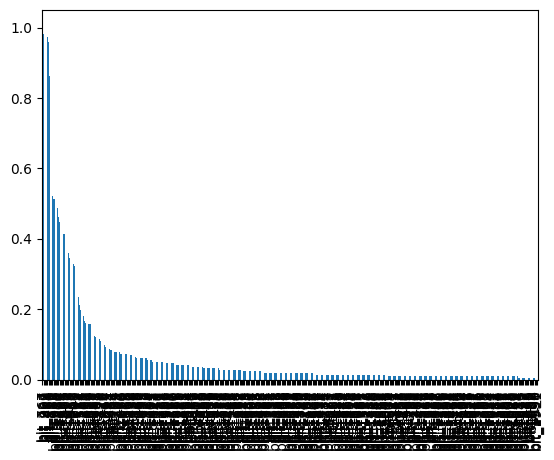

In [ ]:
feature_freq.head(400).plot.bar()

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


<Axes: title={'center': 'Negative correlations'}>

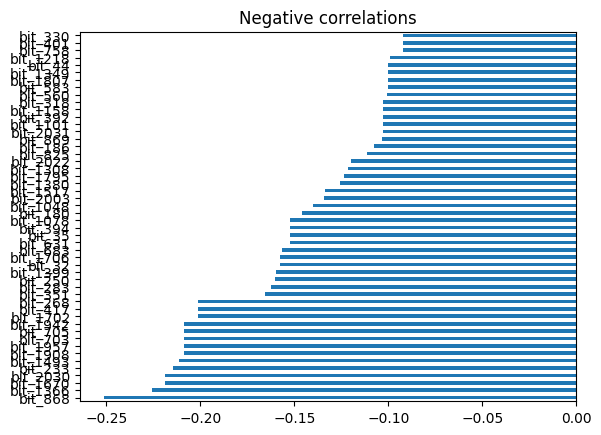

In [ ]:

corrs = {}
for col in df.drop(columns="lgK"):
    corrs[col] = np.corrcoef(df[col], df["lgK"])[0,1]
corrs = pd.Series(corrs).sort_values()

corrs.head(50).plot.barh(title="Negative correlations")

Text(0, 0.5, 'PC2')

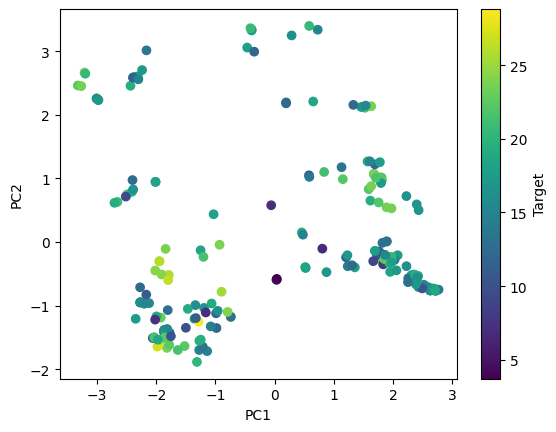

In [ ]:
from sklearn.decomposition import PCA

X = df.drop(columns="lgK").values
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:,0], X_pca[:,1], c=df["lgK"], cmap="viridis")
plt.colorbar(label="Target")
plt.xlabel("PC1"); plt.ylabel("PC2")


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 217 samples in 0.001s...
[t-SNE] Computed neighbors for 217 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 217 / 217
[t-SNE] Mean sigma: 0.060780
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.143837
[t-SNE] KL divergence after 1000 iterations: 0.095963


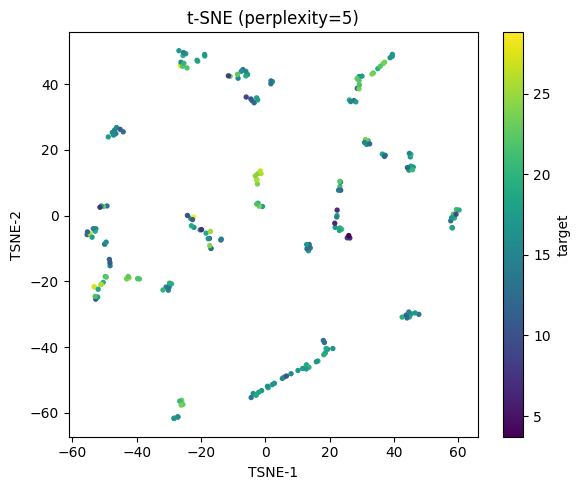

In [ ]:
# t-SNE – tune perplexity to sample size
from sklearn.manifold import TSNE
n = X.shape[0]
perplexity = min(50, max(5, n // 100))  # heuristic; adjust as needed
tsne = TSNE(
    n_components=2,
    perplexity=perplexity,
    learning_rate=max(200, n // 12),
    n_iter=1000,
    init="pca",
    early_exaggeration=12,
    random_state=42,
    verbose=1,
)
y = df["lgK"].values
Y = tsne.fit_transform(X_pca)

# Plot (continuous target)
plt.figure(figsize=(6,5))
sc = plt.scatter(Y[:,0], Y[:,1], c=y, s=8)
plt.colorbar(sc, label="target")
plt.title(f"t-SNE (perplexity={perplexity})")
plt.xlabel("TSNE-1"); plt.ylabel("TSNE-2")
plt.tight_layout()
plt.show()

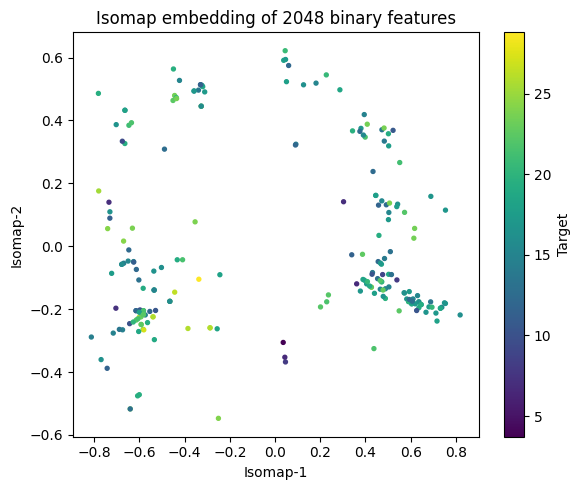

In [ ]:

from sklearn.manifold import Isomap

feature_cols = [c for c in df.columns if c != "lgK"]
X = df[feature_cols].astype(np.float32).values
y = df["lgK"].values

# Optional: Drop near-constant features
keep = (X.mean(axis=0) > 0.005) & (X.mean(axis=0) < 0.995)
X = X[:, keep]

# Isomap
isomap = Isomap(
    n_neighbors=15,   # controls neighborhood size (like perplexity in t-SNE)
    n_components=2,   # 2D embedding
    metric="cosine"  # can try "cosine" or precomputed Jaccard
)
X_iso = isomap.fit_transform(X)

# Plot with continuous target coloring
plt.figure(figsize=(6,5))
sc = plt.scatter(X_iso[:,0], X_iso[:,1], c=y, cmap="viridis", s=8)
plt.colorbar(sc, label="Target")
plt.xlabel("Isomap-1"); plt.ylabel("Isomap-2")
plt.title("Isomap embedding of 2048 binary features")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.feature_selection import mutual_info_regression

mi = mutual_info_regression(df.drop(columns="lgK"), df["lgK"])
mi = pd.Series(mi, index=df.drop(columns="lgK").columns).sort_values()


In [ ]:
mi.tail(50)

,0
bit_3,0.032324
bit_797,0.032674
bit_1464,0.032862
bit_1525,0.032973
bit_50,0.032973
bit_1114,0.032983
bit_525,0.034410
bit_1366,0.034822
bit_1721,0.035052
bit_510,0.037412


## Here we drop ~0 variance (almost constant) features and train lgbm boosting with kfold validation

In [ ]:

from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import VarianceThreshold, mutual_info_regression
from lightgbm import LGBMRegressor

# -------------------------
# Load data
# -------------------------

feature_cols = [c for c in df.columns if c != "lgK"]
X = df[feature_cols].astype(np.float32).values
y = df["lgK"].values

# -------------------------
# 1. Drop near-constant features
# -------------------------
vt = VarianceThreshold(threshold=0.01)  # remove features with <1% variance
X = vt.fit_transform(X)

print("Remaining features:", X.shape[1])

# -------------------------
# 2. Train/validation split
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------
# 3. Define model
# -------------------------
model = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    num_leaves=15,            # smaller, since data is small
    min_data_in_leaf=5,       # allow small leaves
    random_state=42
)

# -------------------------
# 4. Cross-validation
# -------------------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=kf, scoring="r2")
print("CV R2 scores:", cv_scores)
print("Mean CV R2:", np.mean(cv_scores))

# -------------------------
# 5. Train final model
# -------------------------
model.fit(X_train, y_train)



Remaining features: 277
CV R2 scores: [ 0.41572434  0.2426599   0.41520391  0.43773545 -0.29679681]
Mean CV R2: 0.24290536005627744


LGBMRegressor(learning_rate=0.05, min_data_in_leaf=5, n_estimators=500,
              num_leaves=15, random_state=42)

In [ ]:
y_pred = model.predict(X_test)
print("Test RMSE:", mean_squared_error(y_test, y_pred))
print("Test R2:", r2_score(y_test, y_pred))

# -------------------------
# 6. Feature importance
# -------------------------
# import matplotlib.pyplot as plt
# import seaborn as sns

# importances = model.feature_importances_
# indices = np.argsort(importances)[-20:]  # top 20
# plt.figure(figsize=(6,5))
# sns.barplot(x=importances[indices], y=indices)
# plt.xlabel("Importance"); plt.ylabel("Feature Index")
# plt.title("Top-20 Features by Importance")
# plt.show()


Test RMSE: 11.335018085546054
Test R2: 0.4157243434501572


## Let's do some feature engineering and apply stacking upon it



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_selection import mutual_info_regression, VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import ElasticNetCV, Ridge
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from lightgbm import LGBMRegressor

# -------------------------
# 1. Load data
# -------------------------
df = pd.read_csv(files[0])
feature_cols = [c for c in df.columns if c != "lgK"]
X = df[feature_cols].astype(np.float32).values
y = df["lgK"].values

# -------------------------
# 2. Drop constant & rare/common features
# -------------------------
# mask = (X.sum(axis=0) > 2) & (X.sum(axis=0) < len(X)-2)
# X = X[:, mask]
# print("Remaining features:", X.shape[1])

min_count = 5    # keep only features that appear in at least 5 samples
max_count = len(X) - 5  # and not present in almost all samples
mask = (X.sum(axis=0) >= min_count) & (X.sum(axis=0) <= max_count)
X = X[:, mask]
print("Remaining features:", X.shape[1])
# -------------------------
# 3. Aggregate features
# -------------------------
bit_count = X.sum(axis=1).reshape(-1, 1)
bit_frac = bit_count / X.shape[1]

# -------------------------
# 4. Mutual Information selection
# -------------------------
mi = mutual_info_regression(X, y, random_state=42)
top_idx = np.argsort(mi)[-100:]   # top 100 features
X_top = X[:, top_idx]

# -------------------------
# 5. PCA features
# -------------------------
pca = PCA(n_components=30, random_state=42)
X_pca = pca.fit_transform(X)

# -------------------------
# 6. Clustering features
# -------------------------
clusters = KMeans(n_clusters=5, random_state=42).fit_predict(X)
clusters = clusters.reshape(-1, 1)

# -------------------------
# 7. Concatenate all features
# -------------------------
X_final = np.hstack([X_top, bit_count, bit_frac, X_pca, clusters])#, X_tsne])
print("Final feature matrix:", X_final.shape)

# -------------------------
# 8. Train/test split
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------
# 9. Define models
# -------------------------
elastic = ElasticNetCV(
    l1_ratio=[.1, .5, .7, .9, .95, .99, 1],
    alphas=np.logspace(-4, 2, 50),
    cv=5, max_iter=100, random_state=42
)

lgbm = LGBMRegressor(
    n_estimators=500, learning_rate=0.05, num_leaves=15,
    min_data_in_leaf=5, colsample_bytree=0.8,
    subsample=0.8, random_state=42
)

rf = RandomForestRegressor(
    n_estimators=500, max_depth=8,
    random_state=42
)

stack = StackingRegressor(
    estimators=[("enet", elastic), ("lgbm", lgbm), ("rf", rf)],
    final_estimator=Ridge(alpha=1.0)
)

# -------------------------
# 11. Train & evaluate
# -------------------------
stack.fit(X_train, y_train)


Remaining features: 184
Final feature matrix: (217, 133)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.668e-01, tolerance: 3.151e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.009e+00, tolerance: 3.151e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.202e+00, tolerance: 3.151e

[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000466 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 332
[LightGBM] [Info] Number of data points in the train set: 173, number of used features: 166
[LightGBM] [Info] Start training from score 17.687514


Выходные данные были обрезаны до нескольких последних строк (5000).
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.126e+00, tolerance: 2.170e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.532e+00, tolerance: 2.170e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider 

[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000433 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 270
[LightGBM] [Info] Number of data points in the train set: 138, number of used features: 135
[LightGBM] [Info] Start training from score 17.665145
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_le

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000239 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 300
[LightGBM] [Info] Number of data points in the train set: 138, number of used features: 150
[LightGBM] [Info] Start training from score 17.983333
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_le

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000248 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 310
[LightGBM] [Info] Number of data points in the train set: 139, number of used features: 155
[LightGBM] [Info] Start training from score 17.730432
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


StackingRegressor(estimators=[('enet',
                               ElasticNetCV(alphas=array([1.00000000e-04, 1.32571137e-04, 1.75751062e-04, 2.32995181e-04,
       3.08884360e-04, 4.09491506e-04, 5.42867544e-04, 7.19685673e-04,
       9.54095476e-04, 1.26485522e-03, 1.67683294e-03, 2.22299648e-03,
       2.94705170e-03, 3.90693994e-03, 5.17947468e-03, 6.86648845e-03,
       9.10298178e-03, 1.20679264e-02, 1.59985872e-02,...
       7.54312006e+01, 1.00000000e+02]),
                                            cv=5,
                                            l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95,
                                                      0.99, 1],
                                            max_iter=100, random_state=42)),
                              ('lgbm',
                               LGBMRegressor(colsample_bytree=0.8,
                                             learning_rate=0.05,
                                             min_data_in_leaf=5,
                                             n_estimators=500, num_leaves=15,
                                             random_state=42, subsample=0.8)),
                              ('rf',
                               RandomForestRegressor(max_depth=8,
                                                     n_estimators=500,
                                                     random_state=42))],
                  final_estimator=Ridge())

In [ ]:
y_pred = stack.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test RMSE:", rmse)
print("Test R2:", r2)

[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
Test RMSE: 13.76410438154366
Test R2: 0.29051448673012203


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.decomposition import PCA

# ----------------------------------------
# 1. Data preparation & feature engineering
# ----------------------------------------
def prepare_data(df, target_col,  feature_cols=None, test_size=0.2, random_state=42,
                 min_count=5, top_k_features=100, pca_components=30):
    """
    Preprocess dataframe and return train/test splits.

    Steps:
    - Drop constant and near-constant features
    - Add aggregate features (bit count, fraction)
    - Select top features by mutual information
    - Add PCA features
    """
    if feature_cols is None:
        feature_cols = [c for c in df.columns if c != target_col]
    X = df[feature_cols].astype(np.float32).values
    y = df[target_col].values

    X_final = X

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_final, y, test_size=test_size, random_state=random_state
    )

    return X_train, X_test, y_train, y_test


# ----------------------------------------
# 2. Model training
# ----------------------------------------
def train_model(model, X_train, y_train):
    """
    Fit a given model on the training set.
    """
    model.fit(X_train, y_train)
    return model


# ----------------------------------------
# 3. Model evaluation
# ----------------------------------------
def evaluate_model(model, X_test, y_test):
    """
    Evaluate model on test data and print metrics.
    """
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return {"RMSE": rmse, "MAE": mae, "R2": r2}


# Lets check feature importance

In [ ]:
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np

def lasso_feature_importance(df, top_k=20, target_col='lgK', random_state=42):
    """
    Run Lasso regression, return and plot feature importances.
    """
    # Prepare data
    X_train, X_test, y_train, y_test = prepare_data(df, target_col=target_col, random_state=random_state)

    # Train Lasso with cross-validation
    lasso = LassoCV(
        alphas=np.logspace(-4, 2, 50),
        cv=5, max_iter=1000, random_state=random_state
    )
    lasso.fit(X_train, y_train)

    # Evaluate
    print(evaluate_model(lasso, X_test, y_test))

    # Get feature names (prepare_data filtered features, so rebuild)
    feature_cols = [c for c in df.columns if c != target_col]
    X = df[feature_cols].astype(np.float32).values

    # # Mutual Information selection inside prepare_data
    selected_features = np.array(feature_cols)

    # Get coefficients
    coefs = pd.Series(lasso.coef_, index=selected_features)
    coefs = coefs[coefs != 0].sort_values(key=abs, ascending=False)

    print("\nTop nonzero coefficients:")
    print(coefs.head(top_k))

    # Plot
    plt.figure(figsize=(7,5))
    coefs.head(top_k).plot(kind="barh")
    plt.title("Top Lasso Feature Importances")
    plt.xlabel("Coefficient value")
    plt.show()

    return coefs, lasso


def lasso_poly_features(df, degree=2, max_features=100,
                        test_size=0.2, random_state=42, min_count=3, top_k=20):
    """
    Lasso regression with polynomial feature expansion (interactions).

    Args:
        df: DataFrame with binary features and 'lgK' target.
        degree: Polynomial degree (default=2 = pairwise interactions).
        max_features: use only top N raw features (to avoid explosion).
        test_size: fraction of test split.
        min_count: min # of occurrences for a feature to keep.
        top_k: number of top coefficients to display.
    """
    # ----------------------
    # Extract raw features
    # ----------------------
    feature_cols = [c for c in df.columns if c != "lgK"]
    X = df[feature_cols].astype(np.float32).values
    y = df["lgK"].values

    # Drop constant/near-constant
    selected_features = np.array(feature_cols)

    # Keep only top max_features by variance (to control poly explosion)
    if X.shape[1] > max_features:
        variances = X.var(axis=0)
        top_idx = np.argsort(variances)[-max_features:]
        X = X[:, top_idx]
        selected_features = selected_features[top_idx]

    # ----------------------
    # Polynomial expansion
    # ----------------------
    poly = PolynomialFeatures(degree=degree, interaction_only=True, include_bias=False)
    X_poly = poly.fit_transform(X)

    feature_names = poly.get_feature_names_out(selected_features)

    # ----------------------
    # Train-test split
    # ----------------------
    X_train, X_test, y_train, y_test = train_test_split(
        X_poly, y, test_size=test_size, random_state=random_state
    )

    # ----------------------
    # Lasso regression
    # ----------------------
    lasso = LassoCV(
        alphas=np.logspace(-4, 2, 50),
        cv=5,
        max_iter=100,
        random_state=random_state
    )
    print('start')
    lasso.fit(X_train, y_train)

    # ----------------------
    # Evaluation
    # ----------------------
    y_pred = lasso.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R2 : {r2:.4f}")

    # ----------------------
    # Coefficients
    # ----------------------
    coefs = pd.Series(lasso.coef_, index=feature_names)
    coefs = coefs[coefs != 0].sort_values(key=abs, ascending=False)

    print("\nTop nonzero coefficients (polynomial features):")
    print(coefs.head(top_k))

    # Plot
    if not coefs.empty:
        plt.figure(figsize=(8,6))
        coefs.head(top_k).plot(kind="barh")
        plt.title("Top Lasso Feature Importances (Polynomial Features)")
        plt.xlabel("Coefficient value")
        plt.show()

    return coefs, lasso



start


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.702e-01, tolerance: 3.151e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.963e+00, tolerance: 3.151e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.311e+00, tolerance: 3.151e

RMSE: 15.6940
MAE: 3.2489
R2 : 0.1910

Top nonzero coefficients (polynomial features):
bit_1002 bit_1959    3.267329e+00
bit_1085 bit_1924    2.646747e+00
bit_510              1.818219e+00
bit_136 bit_558      1.707556e+00
bit_537 bit_411      1.495352e+00
                         ...     
bit_1272 bit_510     6.961420e-08
bit_666 bit_1978     4.410202e-08
bit_136 bit_666      2.205101e-08
bit_136 bit_1978     2.205101e-08
bit_781 bit_1978     2.205101e-08
Length: 78, dtype: float32


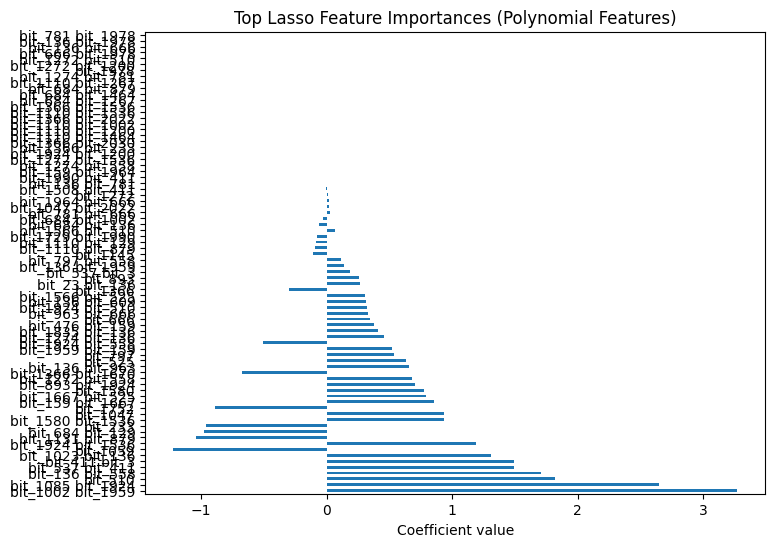

In [ ]:
coefs, lasso = lasso_feature_importance(df, top_k=500)
coefs_poly, lasso_poly = lasso_poly_features(df, top_k=500)

# Polynomial


Top nonzero coefficients:
bit_1002 bit_1959    3.267329
bit_1085 bit_1924    2.646747
bit_510              1.818219
bit_136 bit_558      1.707556
bit_537 bit_411      1.495352
bit_411 bit_3        1.490352
bit_1023 bit_136     1.311852
bit_1059            -1.220424
bit_1924 bit_1536    1.189313
bit_1131 bit_879    -1.037591
bit_684 bit_129     -0.973383
bit_233             -0.958111
bit_1580 bit_1536    0.937702
bit_1047             0.930921
bit_1752            -0.890027
bit_159 bit_1667     0.855621
bit_1667 bit_525     0.793955
bit_1580             0.771003
bit_893 bit_1924     0.704758
bit_1272 bit_558     0.679035
bit_1366 bit_1670   -0.673249
bit_136 bit_963      0.658825
bit_525              0.632114
bit_797              0.534035
bit_1959 bit_159     0.521587
bit_1924 bit_558    -0.507525
bit_1274 bit_136     0.457747
bit_1835 bit_136     0.407413
bit_476 bit_159      0.377108
bit_666              0.343983
bit_963 bit_666      0.325380
bit_1924 bit_510     0.321597
bit_136 bit_6

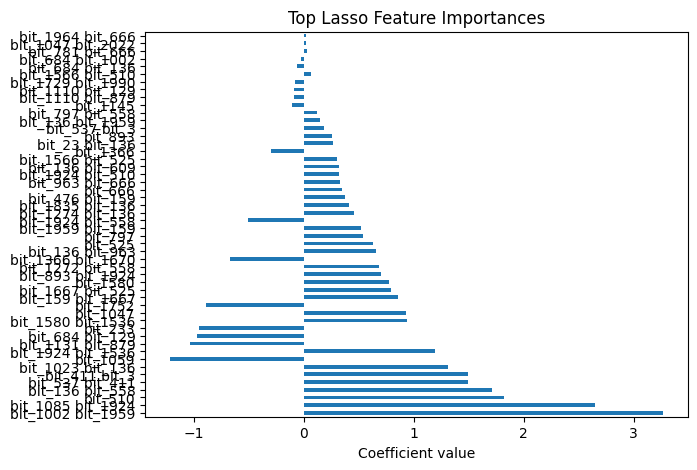

In [ ]:
top_k=50
print("\nTop nonzero coefficients:")
print(coefs_poly.head(top_k))

# Plot
plt.figure(figsize=(7,5))
coefs_poly.head(top_k).plot(kind="barh")
plt.title("Top Lasso Feature Importances")
plt.xlabel("Coefficient value")
plt.show()

## Linear


Top nonzero coefficients:
bit_174     6.002398
bit_671     3.633716
bit_250    -3.555500
bit_703    -3.403400
bit_1857   -3.200209
bit_1002    3.071887
bit_351    -2.986850
bit_1023    2.985773
bit_1959    2.705712
bit_1499    2.491463
bit_688    -2.439852
bit_32     -2.411767
bit_1714    2.271888
bit_1366   -2.257873
bit_1131   -2.243266
bit_537     2.177773
bit_1517   -2.003984
bit_1274    1.978507
bit_403    -1.880127
bit_1399   -1.875469
bit_204     1.797171
bit_1272    1.759136
bit_1952   -1.702939
bit_1580    1.667648
bit_734     1.643552
bit_868    -1.604224
bit_1785    1.603000
bit_1300    1.588983
bit_183    -1.501218
bit_1752   -1.483004
bit_596     1.460370
bit_963     1.455367
bit_1059   -1.380762
bit_1068    1.365842
bit_510     1.365271
bit_877     1.249240
bit_1795   -1.247958
bit_1978    1.226898
bit_182     1.152518
bit_1786    1.116059
bit_927    -0.946602
bit_159     0.909102
bit_564     0.902996
bit_1047    0.898223
bit_582    -0.894850
bit_824     0.894230
bit_411

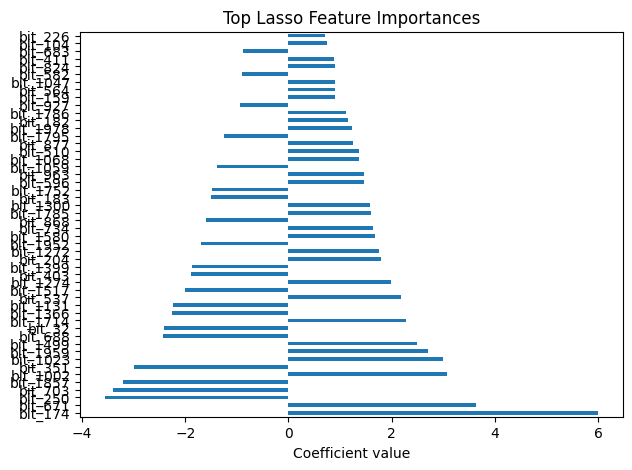

In [ ]:
top_k=50
print("\nTop nonzero coefficients:")
print(coefs.head(top_k))

# Plot
plt.figure(figsize=(7,5))
coefs.head(top_k).plot(kind="barh")
plt.title("Top Lasso Feature Importances")
plt.xlabel("Coefficient value")
plt.show()

# Check that high variance features intersect with high imporant features

In [ ]:
feature_cols = [c for c in df.columns if c != 'lgK']

top20 = (
    df[feature_cols].describe().T  # transpose so stats become columns
    .sort_values("std", ascending=False)  # sort by std
    .head(20)  # top 20
)
top20.index

Index(['bit_525', 'bit_1978', 'bit_666', 'bit_781', 'bit_510', 'bit_1200',
       'bit_1536', 'bit_1897', 'bit_1964', 'bit_963', 'bit_879', 'bit_1667',
       'bit_159', 'bit_3', 'bit_411', 'bit_1959', 'bit_1566', 'bit_1267',
       'bit_1990', 'bit_1464'],
      dtype='object')

In [ ]:
(
    df[coefs.index.tolist()].describe().T  # transpose so stats become columns
    .sort_values("std", ascending=False)  # sort by std
    .head(20)  # top 20
).index

Index(['bit_1978', 'bit_666', 'bit_510', 'bit_963', 'bit_879', 'bit_159',
       'bit_3', 'bit_411', 'bit_1959', 'bit_1002', 'bit_1131', 'bit_1059',
       'bit_537', 'bit_558', 'bit_1786', 'bit_1752', 'bit_1835', 'bit_800',
       'bit_1272', 'bit_429'],
      dtype='object')

# Final Pipeline

lgbm_raw — Базовая модель градиентного бустинга, оперирующая полным набором неконстантых признаков.

lgbm_mi — Модель, включающая этап feature selection на основе максимизации mutual information (MI) между признаками и целевой переменной. Метод направлен на сокращение пространства признаков до наиболее релевантных, что позволяет снизить риск переобучения и улучшить интерпретируемость модели без существенной потери предсказательной способности.

lgbm_svd — Подход, сочетающий сингулярное разложение матрицы (SVD) и градиентный бустинг. SVD применяется для линейного понижения размерности исходного пространства признаков и выделения латентных переменных, описывающих основную дисперсию в данных, с последующим использованием полученных компонент в качестве входных данных для регрессии.

lgbm_pca — Модель, в которой метод главных компонент (PCA) используется для ортогонального преобразования исходных признаков в новый набор некоррелированных переменных. Это позволяет устранить мультиколлинеарность и сконцентрировать информацию в первых главных компонентах, что повышает устойчивость и обобщающую способность алгоритма машинного обучения.

In [3]:
import numpy as np
import pandas as pd

from dataclasses import dataclass
from typing import Dict, Tuple, Any, List

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import RepeatedKFold, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, mutual_info_regression, VarianceThreshold
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import ElasticNetCV
from lightgbm import LGBMRegressor
from tqdm.auto import tqdm
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

# -------------------------
# Custom transformers
# -------------------------

class FrequencyFilter(BaseEstimator, TransformerMixin):
    """
    Remove columns (bits) that are too rare or too common.
    Works on dense numpy arrays. For a binary matrix X in {0,1}.
    """
    def __init__(self, min_count: int = 5, max_exclude: int = 5):
        self.min_count = min_count
        self.max_exclude = max_exclude
        self.keep_idx_: np.ndarray | None = None

    def fit(self, X, y=None):
        col_sum = X.sum(axis=0)
        n = X.shape[0]
        mask = (col_sum >= self.min_count) & (col_sum <= (n - self.max_exclude))
        self.keep_idx_ = np.where(mask)[0]
        return self

    def transform(self, X):
        if self.keep_idx_ is None:
            raise RuntimeError("FrequencyFilter must be fit before transform.")
        return X[:, self.keep_idx_]


# -------------------------
# 1) Data preparation
# -------------------------

def prepare_data(
    df: pd.DataFrame,
    target_col: str = "lgK",
    test_size: float = 0.2,
    random_state: int = 42
) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """
    Splits dataframe into train/test (no leakage-prone ops here).
    Feature selection happens inside Pipelines/CV.
    """
    feature_cols = [c for c in df.columns if c != target_col]
    X = df[feature_cols].astype(np.float32).values
    y = df[target_col].values

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    return X_train, X_test, y_train, y_test


# -------------------------
# 2) Models / Pipelines
# -------------------------

def make_pipelines(
    random_state: int = 42,
    k_best: int = 256,
    n_components: int = 30
) -> Dict[str, Pipeline]:
    """
    Returns a dict of candidate pipelines.
    All selection is *inside* the pipeline (safe for CV).
    """

    # LGBM tuned for very small, sparse-ish data
    lgbm_small = LGBMRegressor(
        n_estimators=600,
        learning_rate=0.03,
        num_leaves=15,
        min_data_in_leaf=5,          # allow small leaves
        feature_fraction=0.7,
        bagging_fraction=0.8,
        bagging_freq=1,
        reg_alpha=0.0,
        reg_lambda=1.0,
        random_state=random_state
    )


    # Baseline: raw 2048 -> LGBM (your current best)
    pipe_lgbm_raw = Pipeline([
        ("vt", VarianceThreshold(threshold=0.0)),      # drop strictly-constant bits
        ("model", lgbm_small)
    ])

    # Aggressive but safe: freq filter -> MI -> LGBM
    # (MI happens in each fold to avoid leakage)
    pipe_lgbm_mi = Pipeline([
        ("vt", VarianceThreshold(threshold=0.01)),
        ("freq", FrequencyFilter(min_count=5, max_exclude=5)),
        ("kbest", SelectKBest(mutual_info_regression, k=k_best)),
        ("model", lgbm_small)
    ])

    pipe_lgbm_pca = Pipeline([
        ('pca', PCA(n_components=n_components, random_state=42)),
        ("model", lgbm_small)
    ])

    # Sparse-friendly dimensionality reduction: TruncatedSVD -> LGBM
    # works like "PCA for sparse", keeping linear co-occurrence structure.
    pipe_lgbm_svd = Pipeline([
        ("vt", VarianceThreshold(threshold=0.01)),
        ("freq", FrequencyFilter(min_count=3, max_exclude=3)),
        ("svd", TruncatedSVD(n_components=n_components, random_state=random_state)),
        ("model", lgbm_small)
    ])

    # Linear baseline (good sanity check)
    pipe_enet = Pipeline([
        ("vt", VarianceThreshold(threshold=0.0)),
        ("freq", FrequencyFilter(min_count=5, max_exclude=5)),
        ("scale", StandardScaler(with_mean=False)),   # binary sparse-like
        ("model", ElasticNetCV(
            l1_ratio=[.1, .5, .7, .9, .95, .99, 1.0],
            alphas=np.logspace(-4, 2, 60),
            cv=3,
            max_iter=2000,
            random_state=random_state
        ))
    ])

    return {
        "lgbm_raw": pipe_lgbm_raw,
        "lgbm_mi": pipe_lgbm_mi,
        "lgbm_svd": pipe_lgbm_svd,
        "lgbm_pca": pipe_lgbm_pca,
        #"elasticnet": pipe_enet,
    }


# -------------------------
# 3) Training
# -------------------------

def train_model(model, X_train, y_train):
    """
    Fit the given model on training data.
    (Use CV outside to choose the model.)
    """
    model.fit(X_train, y_train)
    return model


# -------------------------
# 4) Evaluation (hold-out)
# -------------------------

def evaluate_model(model, X_test, y_test) -> Dict[str, float]:
    """
    Evaluate a trained model on hold-out data; print metrics.
    """
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"RMSE: {rmse:.4f} | MAE: {mae:.4f} | R²: {r2:.4f}")
    return {"RMSE": rmse, "MAE": mae, "R2": r2}


# -------------------------
# 5) Cross-validated model selection
# -------------------------

@dataclass
class CVResult:
    name: str
    mean_r2: float
    std_r2: float
    pipeline: Pipeline

def select_best_pipeline(
    X: np.ndarray, y: np.ndarray, random_state: int = 42
) -> Tuple[CVResult, List[CVResult]]:
    """
    Run robust CV over multiple pipelines, pick the best by mean R².
    """
    pipes = make_pipelines(random_state=random_state)
    rkf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=random_state)  # robust on n=217

    results: List[CVResult] = []
    for name, pipe in tqdm(pipes.items()):
        scores = cross_val_score(pipe, X, y, cv=rkf, scoring="r2", n_jobs=None)
        results.append(CVResult(name, scores.mean(), scores.std(), pipe))

    results.sort(key=lambda r: r.mean_r2, reverse=True)
    best = results[0]
    print("Model ranking (mean±std R²):")
    for r in results:
        print(f"  {r.name:10s} -> {r.mean_r2:.3f} ± {r.std_r2:.3f}")
    print(f"\nSelected: {best.name} (mean R²={best.mean_r2:.3f})")

    return best, results


# -------------------------
# 6) End-to-end usage
# -------------------------

def run_final_pipeline(df: pd.DataFrame, target_col: str = "lgK", random_state: int = 42):
    # split once for a final honest hold-out
    X_train, X_test, y_train, y_test = prepare_data(df, target_col=target_col, random_state=random_state)
    # choose best pipeline via CV on the *training* set only
    best, _ = select_best_pipeline(X_train, y_train, random_state=random_state)
    # fit the chosen pipeline on training, evaluate on hold-out
    best_fitted = train_model(best.pipeline, X_train, y_train)
    print("\nHold-out performance:")
    metrics = evaluate_model(best_fitted, X_test, y_test)
    return best.name, best_fitted, metrics


KeyboardInterrupt: 

In [ ]:
results = {}

for file in tqdm(files):
  df = pd.read_csv(file)
  best_name, best_model, holdout_metrics = run_final_pipeline(df, target_col="lgK", random_state=42)
  results[file] = {'best_name': best_name, 'holdout_metrics': holdout_metrics}



  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Model ranking (mean±std R²):
  lgbm_raw   -> 0.141 ± 0.189
  lgbm_mi    -> 0.141 ± 0.189
  lgbm_svd   -> 0.125 ± 0.191
  lgbm_pca   -> 0.114 ± 0.199

Selected: lgbm_raw (mean R²=0.141)

Hold-out performance:
RMSE: 11.5609 | MAE: 2.6634 | R²: 0.4041


  0%|          | 0/4 [00:00<?, ?it/s]

Model ranking (mean±std R²):
  lgbm_raw   -> 0.189 ± 0.207
  lgbm_mi    -> 0.189 ± 0.207
  lgbm_pca   -> 0.174 ± 0.183
  lgbm_svd   -> 0.142 ± 0.178

Selected: lgbm_raw (mean R²=0.189)

Hold-out performance:
RMSE: 10.9314 | MAE: 2.5840 | R²: 0.4365


  0%|          | 0/4 [00:00<?, ?it/s]

Model ranking (mean±std R²):
  lgbm_raw   -> 0.178 ± 0.164
  lgbm_mi    -> 0.178 ± 0.164
  lgbm_pca   -> 0.130 ± 0.171
  lgbm_svd   -> 0.090 ± 0.213

Selected: lgbm_raw (mean R²=0.178)

Hold-out performance:
RMSE: 17.8344 | MAE: 3.4889 | R²: 0.0807


  0%|          | 0/4 [00:00<?, ?it/s]

Model ranking (mean±std R²):
  lgbm_raw   -> 0.219 ± 0.193
  lgbm_mi    -> 0.219 ± 0.193
  lgbm_pca   -> 0.132 ± 0.175
  lgbm_svd   -> 0.122 ± 0.213

Selected: lgbm_raw (mean R²=0.219)

Hold-out performance:
RMSE: 11.8243 | MAE: 2.5271 | R²: 0.3905


  0%|          | 0/4 [00:00<?, ?it/s]

Model ranking (mean±std R²):
  lgbm_raw   -> 0.146 ± 0.189
  lgbm_mi    -> 0.146 ± 0.189
  lgbm_svd   -> 0.118 ± 0.195
  lgbm_pca   -> 0.114 ± 0.206

Selected: lgbm_raw (mean R²=0.146)

Hold-out performance:
RMSE: 11.8063 | MAE: 2.7110 | R²: 0.3914


  0%|          | 0/4 [00:00<?, ?it/s]

Model ranking (mean±std R²):
  lgbm_raw   -> 0.176 ± 0.200
  lgbm_mi    -> 0.176 ± 0.200
  lgbm_pca   -> 0.137 ± 0.198
  lgbm_svd   -> 0.091 ± 0.178

Selected: lgbm_raw (mean R²=0.176)

Hold-out performance:
RMSE: 12.7689 | MAE: 2.8586 | R²: 0.3418


  0%|          | 0/4 [00:00<?, ?it/s]

Model ranking (mean±std R²):
  lgbm_raw   -> 0.162 ± 0.181
  lgbm_mi    -> 0.162 ± 0.181
  lgbm_pca   -> 0.128 ± 0.172
  lgbm_svd   -> 0.041 ± 0.232

Selected: lgbm_raw (mean R²=0.162)

Hold-out performance:
RMSE: 15.4978 | MAE: 3.1642 | R²: 0.2012


  0%|          | 0/4 [00:00<?, ?it/s]

Model ranking (mean±std R²):
  lgbm_raw   -> 0.194 ± 0.207
  lgbm_mi    -> 0.194 ± 0.207
  lgbm_pca   -> 0.173 ± 0.187
  lgbm_svd   -> 0.163 ± 0.192

Selected: lgbm_raw (mean R²=0.194)

Hold-out performance:
RMSE: 12.6157 | MAE: 2.7435 | R²: 0.3497


  0%|          | 0/4 [00:00<?, ?it/s]

Model ranking (mean±std R²):
  lgbm_raw   -> 0.292 ± 0.191
  lgbm_mi    -> 0.292 ± 0.191
  lgbm_pca   -> 0.223 ± 0.186
  lgbm_svd   -> 0.146 ± 0.210

Selected: lgbm_raw (mean R²=0.292)

Hold-out performance:
RMSE: 15.1766 | MAE: 2.9657 | R²: 0.2177


  0%|          | 0/4 [00:00<?, ?it/s]

Model ranking (mean±std R²):
  lgbm_raw   -> 0.164 ± 0.212
  lgbm_mi    -> 0.164 ± 0.212
  lgbm_pca   -> 0.118 ± 0.208
  lgbm_svd   -> 0.013 ± 0.223

Selected: lgbm_raw (mean R²=0.164)

Hold-out performance:
RMSE: 15.8252 | MAE: 3.2019 | R²: 0.1843


  0%|          | 0/4 [00:00<?, ?it/s]

Model ranking (mean±std R²):
  lgbm_raw   -> 0.180 ± 0.149
  lgbm_mi    -> 0.180 ± 0.149
  lgbm_pca   -> 0.069 ± 0.227
  lgbm_svd   -> 0.055 ± 0.219

Selected: lgbm_raw (mean R²=0.180)

Hold-out performance:
RMSE: 15.8894 | MAE: 3.1764 | R²: 0.1810


  0%|          | 0/4 [00:00<?, ?it/s]

Model ranking (mean±std R²):
  lgbm_pca   -> 0.261 ± 0.138
  lgbm_raw   -> 0.248 ± 0.181
  lgbm_mi    -> 0.248 ± 0.181
  lgbm_svd   -> 0.200 ± 0.197

Selected: lgbm_pca (mean R²=0.261)

Hold-out performance:
RMSE: 13.7552 | MAE: 2.6503 | R²: 0.2910


  0%|          | 0/4 [00:00<?, ?it/s]

Model ranking (mean±std R²):
  lgbm_pca   -> 0.195 ± 0.177
  lgbm_svd   -> 0.191 ± 0.191
  lgbm_raw   -> 0.168 ± 0.238
  lgbm_mi    -> 0.168 ± 0.238

Selected: lgbm_pca (mean R²=0.195)

Hold-out performance:
RMSE: 16.5854 | MAE: 3.1507 | R²: 0.1451


  0%|          | 0/4 [00:00<?, ?it/s]

Model ranking (mean±std R²):
  lgbm_raw   -> 0.168 ± 0.162
  lgbm_mi    -> 0.168 ± 0.162
  lgbm_pca   -> 0.131 ± 0.154
  lgbm_svd   -> 0.009 ± 0.243

Selected: lgbm_raw (mean R²=0.168)

Hold-out performance:
RMSE: 14.3661 | MAE: 3.0594 | R²: 0.2595


In [ ]:
print(results)

{'Gd_ctopo_fp_cmplx_da.csv': {'best_name': 'lgbm_raw', 'holdout_metrics': {'RMSE': 11.560871490641391, 'MAE': 2.66344021083991, 'R2': 0.40408248760571286}}, 'Gd_ctopo_fp_cmplx_full.csv': {'best_name': 'lgbm_raw', 'holdout_metrics': {'RMSE': 10.931435583906541, 'MAE': 2.583994437842876, 'R2': 0.43652743607319766}}, 'Gd_ctopo_fp_topo.csv': {'best_name': 'lgbm_raw', 'holdout_metrics': {'RMSE': 17.834396016381593, 'MAE': 3.4889100738033134, 'R2': 0.08070694170936787}}, 'Gd_ctopo_fp_cmplx_da_sub_bonds.csv': {'best_name': 'lgbm_raw', 'holdout_metrics': {'RMSE': 11.824288883178507, 'MAE': 2.5270538693081153, 'R2': 0.39050435576598264}}, 'Gd_ctopo_fp_cmplx_da_bonds.csv': {'best_name': 'lgbm_raw', 'holdout_metrics': {'RMSE': 11.806347129031558, 'MAE': 2.7109840529457787, 'R2': 0.39142918271418414}}, 'Gd_ctopo_fp_cmplx.csv': {'best_name': 'lgbm_raw', 'holdout_metrics': {'RMSE': 12.768851337109636, 'MAE': 2.8586445585289186, 'R2': 0.34181587165789973}}, 'Gd_ctopo_fp_skl_da.csv': {'best_name': 'lg

In [ ]:
import json
with open('results.json', 'w') as f:
    json.dump(results, f)